# Introduction

We reccomend coding Python 3, as we did. We used multiple imported libraries, primarily: <a href="https://pandas.pydata.org/pandas-docs/stable/">pandas</a>, <a href ="https://docs.scipy.org/doc/numpy/user/">numpy</a>, matplotlib, scikit-learn, and seaborn.

In [1]:
# In order to complete this tutorial, you will need these libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn import linear_model
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


Our tutorial focuses specifically on students in a portugese class, however, there is also data on students in a math class. We decided to look only at the portugese class for our analysis. This is because there are duplicate students between the two classes, and if you decided to use both data sets you would have to merge duplicates or take into account during your analysis that there are duplicates. Because of this, and because the total amount of students once duplicates have been merged is not significantly higher than the number of students in the portugese class, we decided to use the portugese set for our analysis. However, when you are analyzing the data, feel free to choose whatever data you want, as long as you keep the duplicates in mind.

In [2]:
data = pd.read_csv("student-por.csv")

# Tidying the Data

Our table has a lot of columns, which is great for us, since we want as much information as possible so we can atttempt to find as many interesting correlations as possible. However, our table can be a bit confusing, so for a full explanation of each column and what it includes, please visit <a href="https://www.kaggle.com/uciml/student-alcohol-consumption">Student Alcohol Consumption Data</a> (which is the source of our data).

## Drop irrelevant columns

* Because there are so many columns, we will not end up using all of them in this tutorial, so for clarity we have dropped the ones we did not use. When you perform your analysis, you may decide you want to use certain columns that we have dropped, and then you can drop whichever columns you do not use.

In [3]:
# data = data.drop(["address",'reason','health'])

## Rename Vague Columns

* Although we previously linked an explanation for each column and what it contains, there were still some column titles that we felt were unintuitive, so we gave them clearer names. You can rename any columns whose names you think are vague or mislabelled.
* Often when performing analysis it is easier to use numbers than strings, and many columns here have a binary answer of either 'yes' or 'no'. Replace those with 1s and 0s so that they will be easier to analyze later.

In [4]:
data = data.rename(columns={"goout": 'social_activity', 'Pstatus' : 'parental_status', 'Dalc' : 'Weekday_alc', 'Walc' : 'Weekend_alc'})
data = data.replace('yes', 1).replace('no', 0)

In [5]:
data.head()

,school,sex,age,address,famsize,parental_status,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,social_activity,Weekday_alc,Weekend_alc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Exploratory Data Analysis

## Correlation Exploration - Weekend Alcohol Use

## Correlation Exploration - Grades

## Social participation
* We theorize that social participation has a significant correlation to alcohol usage, so we will start by analyzing each student's social participation.
* We attempt to quantify a student's social experience between 1 and 7, where 1 is the least socially active and 7 is the most. This is based on a student's romantic status, their extra-curricular particiaption, and their social activities outside of school.

* First, look at the quantity of students who participate in each social activity.

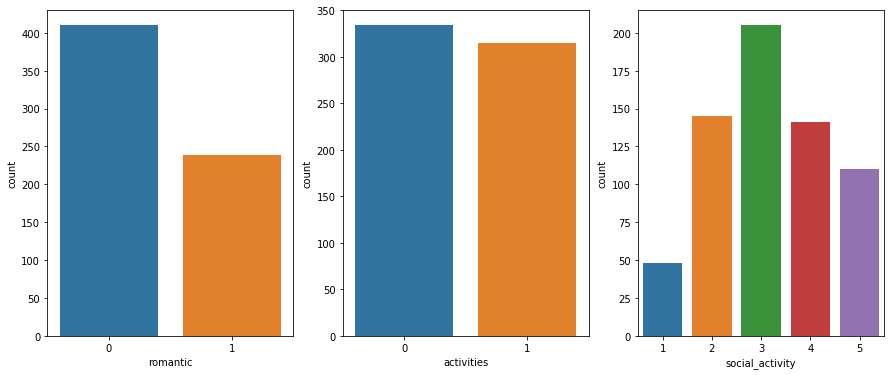

In [6]:
fig, ax = plt.subplots(1,3, figsize=(15,6))
sns.countplot(x='romantic', data=data, ax=ax[0])
sns.countplot(x='activities', data=data, ax=ax[1])
sns.countplot(x='social_activity', data=data, ax=ax[2])

* In order to clarify different correlations between each possible social activity, we looked at a violin plot of each combination of social activities

Text(0.5, 1.0, 'romantic status vs extra-curriculars')

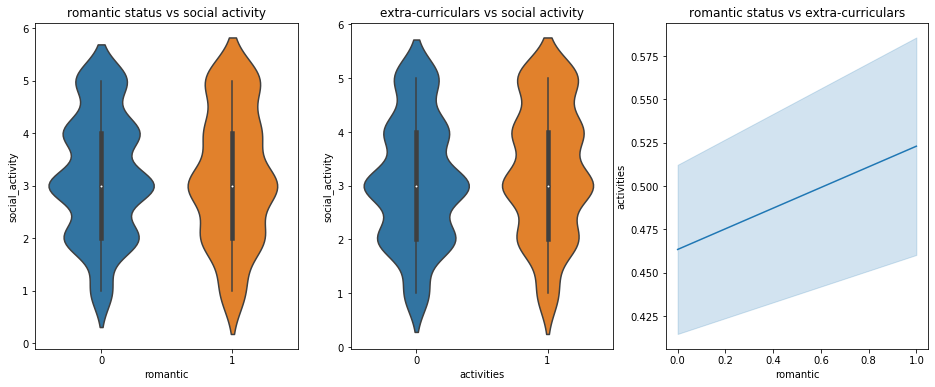

In [7]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
sns.violinplot(x='romantic', y='social_activity', data=data, ax=ax[0]).set_title('romantic status vs social activity')
sns.violinplot(x='activities', y= 'social_activity', data=data, ax=ax[1]).set_title('extra-curriculars vs social activity')
sns.lineplot(x='romantic',y='activities', data=data, ax=ax[2]).set_title('romantic status vs extra-curriculars')

* Next, add a column in our data table that will keep track of each student's total social participation, which we can later use to analyze social participation as a whole and its affect on other variables.

In [8]:
data['social_participation'] = data['romantic'] + data['activities'] + data['social_activity']
data.head()

,school,sex,age,address,famsize,parental_status,Medu,Fedu,Mjob,Fjob,...,freetime,social_activity,Weekday_alc,Weekend_alc,health,absences,G1,G2,G3,social_participation
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,3
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,4
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,2


## Socioeconomic Status

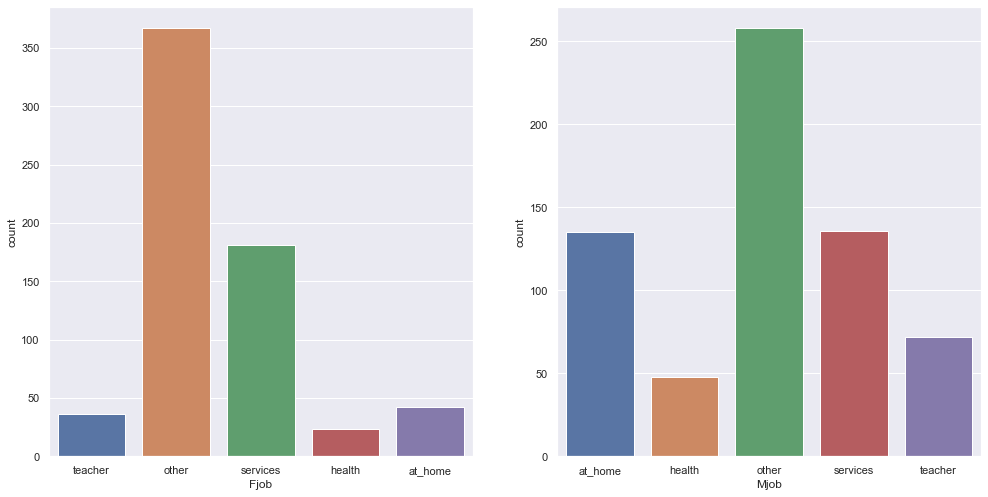

In [9]:
sns.set(rc={'figure.figsize':(16.7,8.27)})
fig, ax = plt.subplots(1,2)
data['parents_edu'] = (data['Fedu'] + data['Medu'])/2
sns.countplot(x = 'Fjob' , data = data, ax=ax[0])
sns.countplot(x = 'Mjob', data = data, ax=ax[1])

Here, we just want to look at demographic of the school class provided in the data set. First, I listed the jobs of parents. Unforunately, it seems that this question does not provide much info, as a large majority of students' responded other. The second most common option selected was service jobs. These service jobs refer to civil service such as administrative services or police services. It is also interesting to note that a solidly large portion of mothers were stay at home moms. 

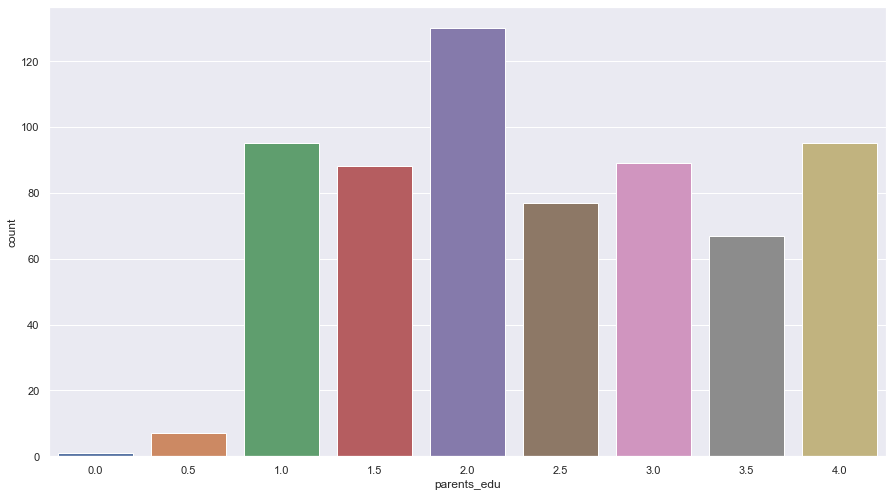

In [10]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.countplot(x = 'parents_edu', data = data)

The parents education variable provides better information. The above graph list parents_edu which is the average of the mother's education and the father's education levels. Each parent reponded on a scale of 0-4 where:
* 0 - none
* 1 - 4th grade
* 2 - 5th to 9th grade
* 3 - high school
* 4 - higher education
Only about 160 students have at least one parent who attended higher education. More than half the students have one parent who did not even complete high school. It seems seems here that we are dealing with students who come from homes that are not very well educated.

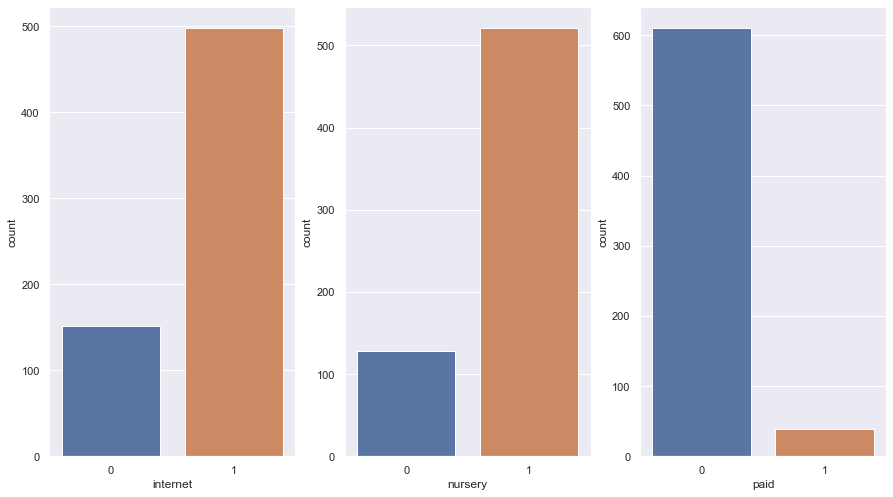

In [11]:
_ , ax = plt.subplots(1,3)
sns.countplot(x = 'internet', data = data, ax = ax[0])
sns.countplot(x = 'nursery', data = data, ax = ax[1])
sns.countplot(x = 'paid', data = data, ax = ax[2])

Next, we look at other data to try and get a sense of the socioeconmic status of the students. Most students have internet at home and also attended nursery school. However, there is a still a significant population that either did not attend nursery school or does not have internet at home, which are pretty basic needs and are another indicator that we are dealing with a population that has low socioeconomic status. Also, almost not students recieved extra paid help, another indicator that these students come from families that cannot afford paying tutors and extra help.

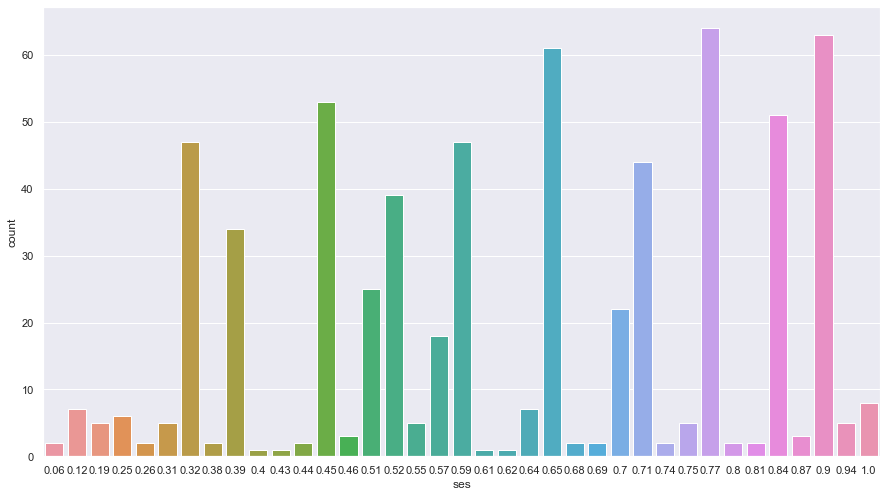

In [12]:
data['ses'] = round(0.5 * (data['parents_edu']/4) +\
              0.2 * data['internet'] + \
              0.2 * data['nursery'] +\
              0.1 * data['paid'], 2)

sns.countplot(x = 'ses', data = data)

Here I create a variable to capture the socioeconmic status of the students. I made the variable on a scale from 0 to 1. I weighted parent's education the most when considering socioeconomic status, as education is a strong predictor of SES. I assigned some weight to the internet, nursery, and tutoring variables, but not as much.

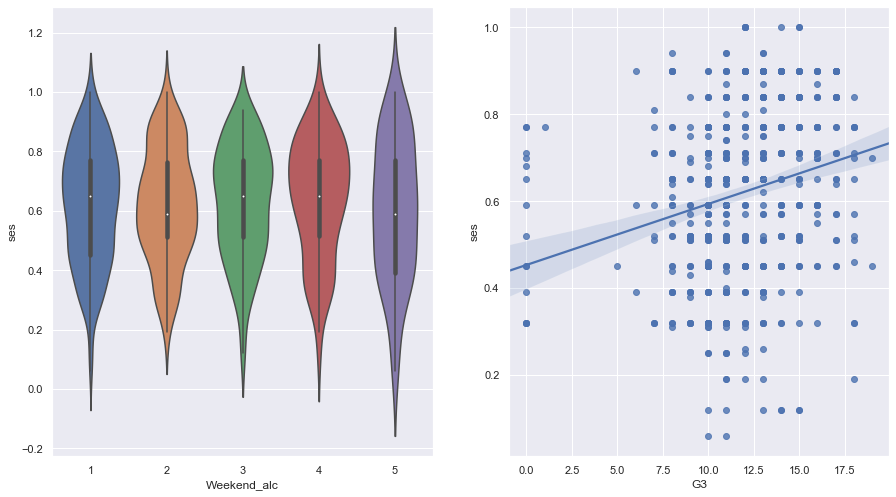

In [13]:
_ , ax = plt.subplots(1,2)
sns.violinplot(x = 'Weekend_alc', y = 'ses', data = data, ax = ax[0])
sns.regplot(x = 'G3', y = 'ses', data = data, ax = ax[1])

Here I plot SES vs other factors. There seems to be little correlation between SES and alchohol consumption, which makes sense. There is no reason why wealth should factor in to the consumption of alchohol. Similarly, there seems to be little to no correlation between social participation and SES, as social participation is a basic human need and not really dependent on SES. However, there seems to be a small but significant positive correlation betweeen grades and SES. This makes sense, especially as my SES variable is highly dependent on the student's parents' education. Educated parents either means that there the parents are smart and can pass on those genes to their children, the parents have the resources to help educated their children, or the parents care about and emphasize education.

## Correlation Exploration - Weekend Alcohol Use

Now we will take a look at how social participation affects weekend alcohol consumption. Remember, social participation is made up of romantic status, extra-curricular particiaption, and social activities outside of school. As you can see, there is a strong correlation between a student's social participation level and their weekend alcohol consumption.
Furthermore, weekday and weekend alcohol are strongly correlated. It seems people who drink sometimes, drink all the time.

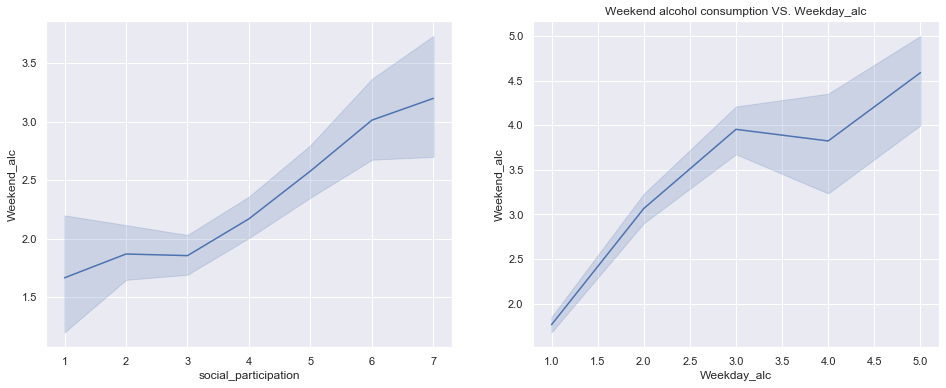

In [14]:
i=0
_ , ax = plt.subplots(1,2, figsize=(16,6))
for col in ['social_participation','Weekday_alc']:
    x = col
    y = data.Weekend_alc
    plt.title("Weekend alcohol consumption VS. " + col)
    sns.lineplot(x=data[x], y=y, ax = ax[i])
    i+=1

Now lets take a look at freetime and age. There is a decent correlation between the two. It seems as someones free time goes up, they have more time to drink alcohol on weekends.
Regarding age, there is a large increase in alcohol consumption once a student reaches age 21. However, this graph does not display the full picture as there are only 2 studnets aged 21 and one student aged 22.

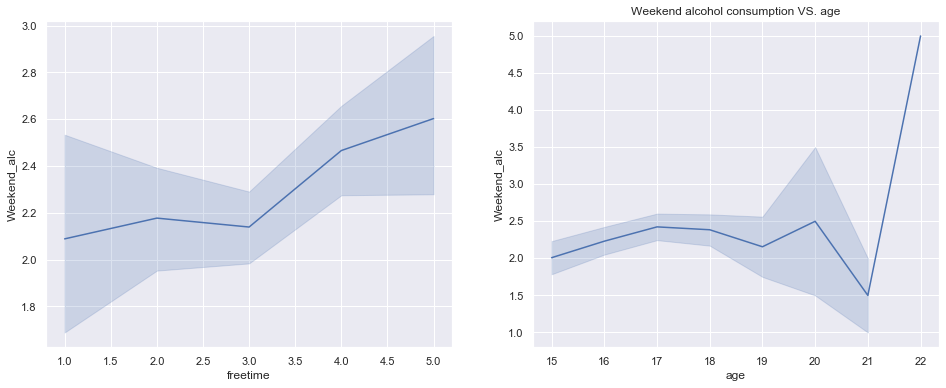

In [15]:
i=0
_ , ax = plt.subplots(1,2, figsize=(16,6))
for col in ['freetime','age']:
    x = col
    y = data.Weekend_alc
    plt.title("Weekend alcohol consumption VS. " + col)
    sns.lineplot(x=data[x], y=y, ax = ax[i])
    i+=1

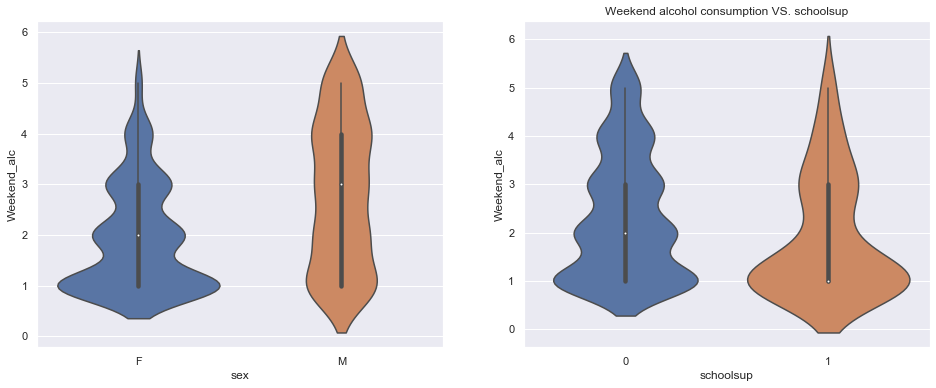

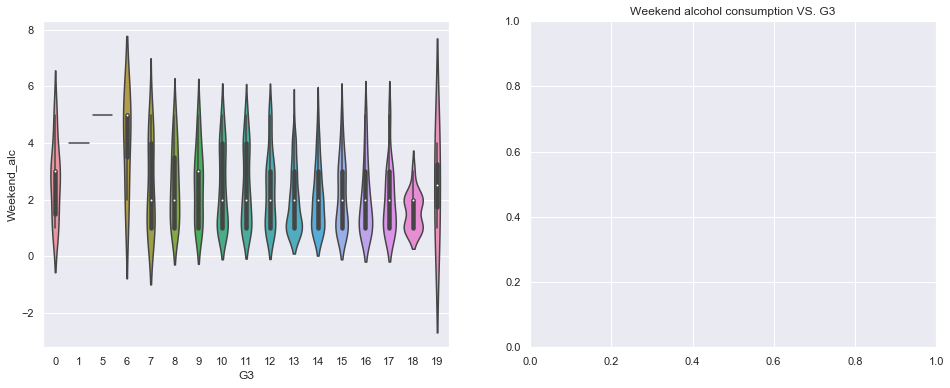

In [16]:
i=0
time = 0
_ , ax = plt.subplots(1,2, figsize=(16,6))
for col in ['sex','schoolsup','G3']:
    x = col
    y = data.Weekend_alc
    plt.title("Weekend alcohol consumption VS. " + col)
    if time != 3 :
        sns.violinplot(x=data[x], y=y, ax = ax[i])
    else :
        sns.violinplot(x=data[x], y=y)
    i+=1
    if i == 2 :
        if time < 2 :
            _ , ax = plt.subplots(1,2, figsize=(16,6))
        else :
            _ , ax = plt.subplots(figsize=(16,6))
        i = 0
        time+=1

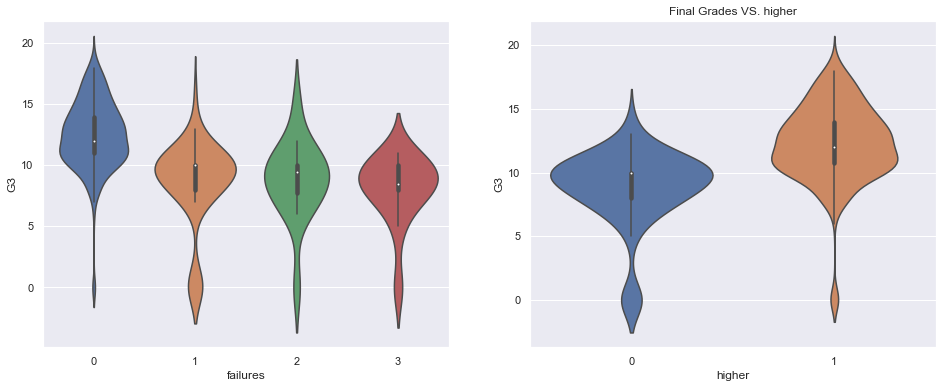

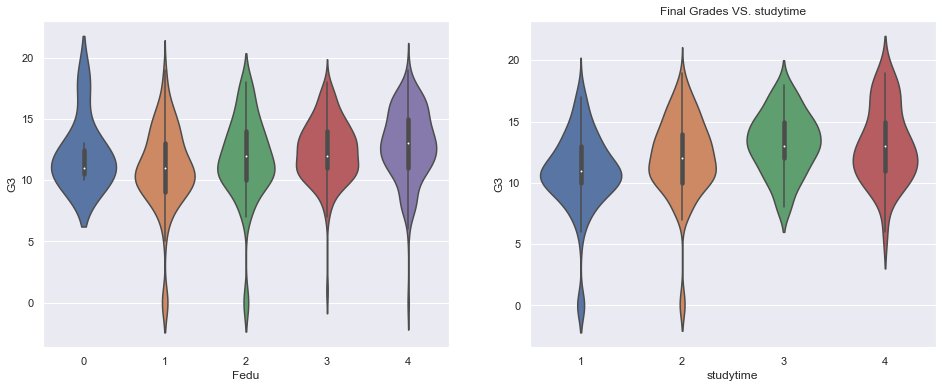

In [17]:
i = 0
check = True
_ , ax = plt.subplots(1,2, figsize=(16,6))
for col in ['failures','higher','Fedu','studytime']:
    x = col
    y = data.G3
    plt.title("Final Grades VS. " + col)
    sns.violinplot(x=data[x], y=y, ax=ax[i])
    i+=1
    if i == 2 and check:
        _ , ax = plt.subplots(1,2, figsize=(16,6))
        i = 0
        check = False

# Machine Learning

## Using social participation and socioeconomic status to predict weekend alcohol usage

In [18]:
sp = [[el] for el in data['social_participation']]
regr = linear_model.LinearRegression()
reg = regr.fit(sp, data[['Weekend_alc']])
predictions = reg.predict(sp).flatten()
residuals1 = data['Weekend_alc'] - predictions

Text(0, 0.5, 'Residual')

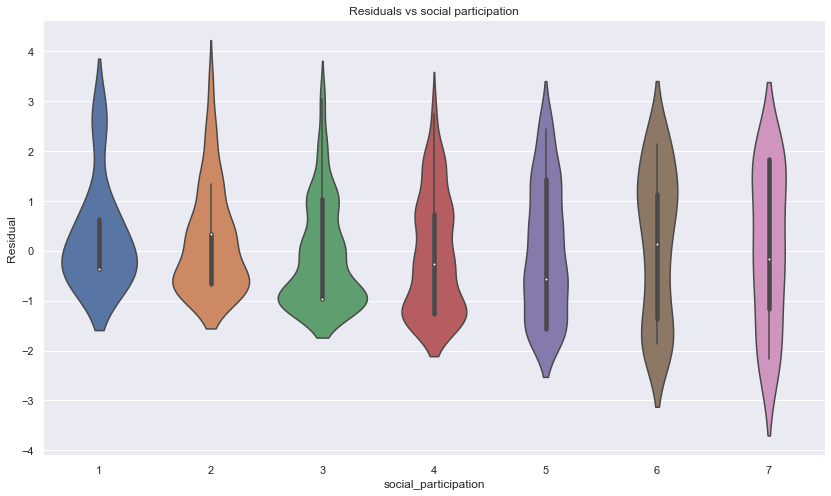

In [19]:
plt.subplots(figsize=(14, 8))
v = sns.violinplot(x='social_participation', y=residuals1, data=data)
v.set_title("Residuals vs social participation")
v.set_ylabel("Residual")

In [20]:
ses = [[el] for el in data['ses']]
regr = linear_model.LinearRegression()
reg = regr.fit(ses, data[['Weekend_alc']])
predictions = reg.predict(ses).flatten()
residuals2 = data['Weekend_alc'] - predictions

Text(0, 0.5, 'Residual')

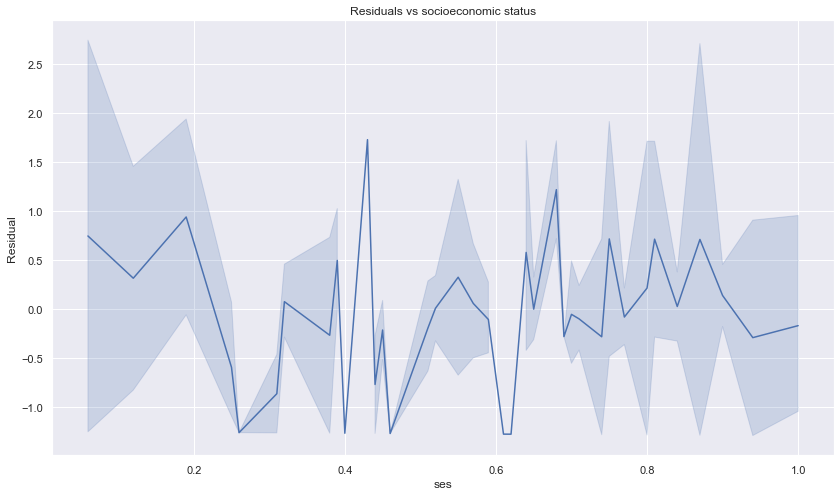

In [21]:
plt.subplots(figsize=(14, 8))
v = sns.lineplot(x='ses', y=residuals2, data=data)
v.set_title("Residuals vs socioeconomic status")
v.set_ylabel("Residual")

Clearly, we should include an interaction term for both socioeconomic status and social participation when predicting alcohol usage, as both play a significant role.

In [22]:
data['sp_ses_interaction'] = data['social_participation']*data['ses']

In [23]:
regr = linear_model.LinearRegression()
reg = regr.fit(data[['social_participation','ses', 'sp_ses_interaction']].values, data[['Weekend_alc']])
residuals3 = data['Weekend_alc'] - [term[0] for term in reg.predict(data[['social_participation', 'ses', 'sp_ses_interaction']])]

In [24]:
reg.coef_ # Note the third (interaction is closest to zero)

array([[ 0.34668093,  0.16585808, -0.07666273]])

Text(0, 0.5, 'Residual')

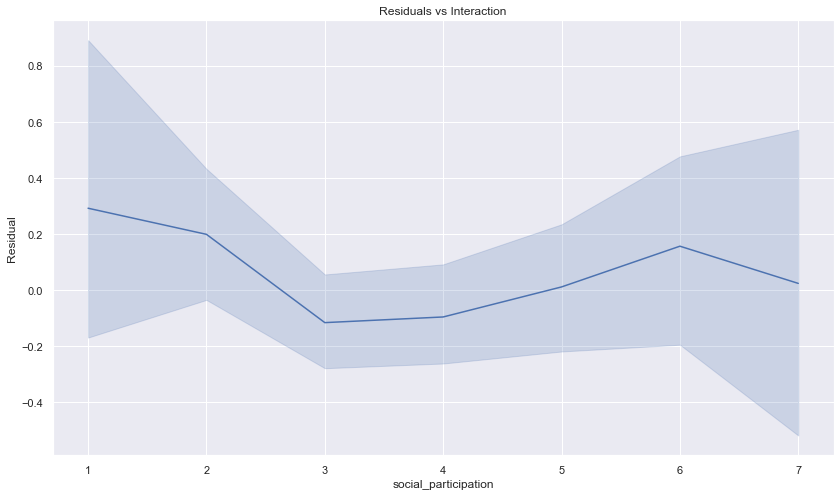

In [25]:
plt.subplots(figsize=(14, 8))
v = sns.lineplot(x='social_participation', y=residuals3, data=data)
v.set_title("Residuals vs Interaction")
v.set_ylabel("Residual")

To confirm that the interaction term actually is a better predictor, let's compare the residuals of each of the three predictions.

# NATAN

In [26]:
X_social = data[['social_participation']]
X_alc = data[['Weekend_alc']]
X_ses = data[['ses']]
y_grades = data['G3']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train_social, X_test_social, y_train_social, y_test_social = train_test_split(X_social, y_grades, test_size=0.33)
X_train_alc, X_test_alc, y_train_alc, y_test_alc = train_test_split(X_alc,y_grades,test_size = 0.33)
X_train_ses, X_test_ses, y_train_ses, y_test_ses = train_test_split(X_ses,y_grades,test_size = 0.33)

In [28]:
# 
y_train_social = preprocessing.LabelEncoder().fit_transform(y_train_social)
y_test_social = preprocessing.LabelEncoder().fit_transform(y_test_social)
# 
y_train_alc = preprocessing.LabelEncoder().fit_transform(y_train_alc)
y_test_alc = preprocessing.LabelEncoder().fit_transform(y_test_alc)
#
y_train_ses = preprocessing.LabelEncoder().fit_transform(y_train_ses)
y_test_ses = preprocessing.LabelEncoder().fit_transform(y_test_ses)

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# models for social
clfKNN = KNeighborsRegressor(n_neighbors=5)
clfTree = DecisionTreeRegressor(random_state = 0)
clfLin = LinearRegression()
# 
clfKNN.fit(X_train_social, y_train_social)
clfTree.fit(X_train_social,y_train_social)
clfLin.fit(X_train_social,y_train_social)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
from sklearn.model_selection import cross_val_score
kNNScores = cross_val_score(clfKNN, X_test_social, y_test_social, cv=10)
treeScores = cross_val_score(clfTree, X_test_social, y_test_social, cv=10)
linScores = cross_val_score(clfLin,X_test_social,y_test_social, cv = 10)
print("kNN Mean: " + str(np.mean(kNNScores)))
print("tree Mean: "+ str(np.mean(treeScores)))
print("log Mean: " + str(np.mean(linScores)))

kNN Mean: -0.3123720389898783
tree Mean: -0.06321634955256523
log Mean: -0.04529564617941263


In [31]:
from sklearn.base import clone
clfKNN = clone(clfKNN)
clfTree = clone(clfTree)
clfLin = clone(clfLin)

clfKNN.fit(X_train_alc, y_train_alc)
clfTree.fit(X_train_alc,y_train_alc)
clfLin.fit(X_train_alc,y_train_alc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
kNNScores = cross_val_score(clfKNN, X_test_alc, y_test_alc, cv=10)
treeScores = cross_val_score(clfTree, X_test_alc, y_test_alc, cv=10)
linScores = cross_val_score(clfLin,X_test_alc,y_test_alc,cv = 10)
print("kNN Mean: " + str(np.mean(kNNScores)))
print("tree Mean: "+ str(np.mean(treeScores)))
print("log Mean: " + str(np.mean(linScores)))

kNN Mean: -0.45385677529995655
tree Mean: -0.057257161935921876
log Mean: -0.06125314053566984


In [33]:
clfKNN = clone(clfKNN)
clfTree = clone(clfTree)
clfLin = clone(clfLin)

clfKNN.fit(X_train_ses, y_train_ses)
clfTree.fit(X_train_ses,y_train_ses)
clfLin.fit(X_train_ses,y_train_ses)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
kNNScores = cross_val_score(clfKNN, X_test_ses, y_test_ses, cv=10)
treeScores = cross_val_score(clfTree, X_test_ses, y_test_ses, cv=10)
linScores = cross_val_score(clfLin,X_test_ses,y_test_ses, cv = 10)
print("kNN Mean: " + str(np.mean(kNNScores)))
print("tree Mean: "+ str(np.mean(treeScores)))
print("log Mean: " + str(np.mean(linScores)))

kNN Mean: -0.2602135476548268
tree Mean: -0.1209751296811205
log Mean: -0.04107955367530295
